In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import astropy.units as u
from orbit_functions import *
from scipy.optimize import *
from functools import partial
from galpy.potential import MWPotential2014,PowerSphericalPotential,HernquistPotential
import matplotlib.colors as mcolors
from scipy.ndimage import gaussian_filter
from galpy.potential import plotRotcurve


(-A+2)/2=-0.1
A=2.2


(-A+2)/2=0.1
A=1.8

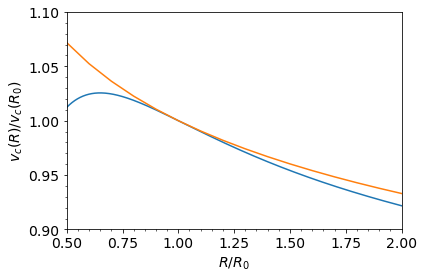

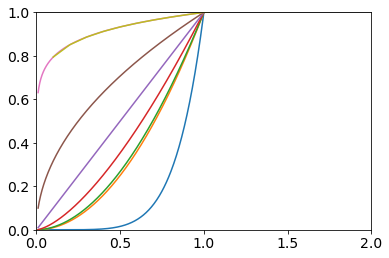

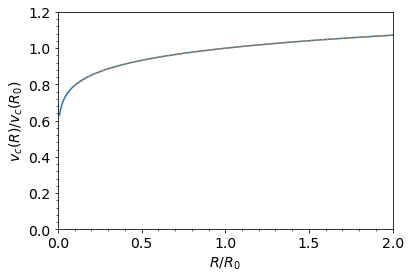

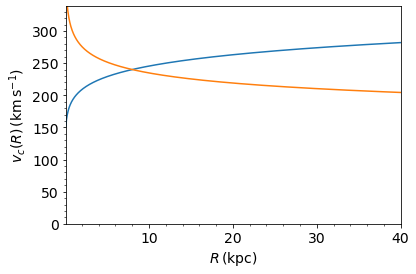

In [24]:
from galpy.potential import plotRotcurve
r=np.arange(0.1,3.,.1)

n=-10.
V=Vf(r,n=n,Vc=1.,hr=1.)
a=plotRotcurve(MWPotential2014,Rrange=[0.5,2],grid=1001,yrange=[0.9,1.1])
plt.plot(r,V)
plt.show()

alphas=[-10,-2,-1.8,-1.,0,1,1.8,2]
for alpha in alphas:
    hp= PowerSphericalPotential(amp=0.1, alpha=alpha, normalize=True, r1=1.0)
    plotRotcurve(hp,Rrange=[0.01,2.],grid=1001,yrange=[0.,1.2],overplot=True)
n=10
V3=Vf(r,n=n,Vc=1.,hr=1.)
plt.plot(r,V3)
plt.xlim(0,2)
plt.show()


hp= PowerSphericalPotential(amp=0.1, alpha=1.8, normalize=True, r1=1.0)
plotRotcurve(hp,Rrange=[0.01,2.],grid=1001,yrange=[0.,1.2])
V3=Vf(r,n=n,Vc=1.,hr=1.)
plt.plot(r,V3,linestyle=':')
plt.xlim(0,2)
plt.show()


hp= PowerSphericalPotential(amp=0.1, alpha=1.8, normalize=True, r1=1.0,ro=8.,vo=240.)
plotRotcurve(hp)
hp= PowerSphericalPotential(amp=10, alpha=2.2, normalize=True, r1=1.0,ro=8.,vo=240.)
plotRotcurve(hp,overplot=True)


-2.0
-10.0
100.0
10.0
2.0
1.0


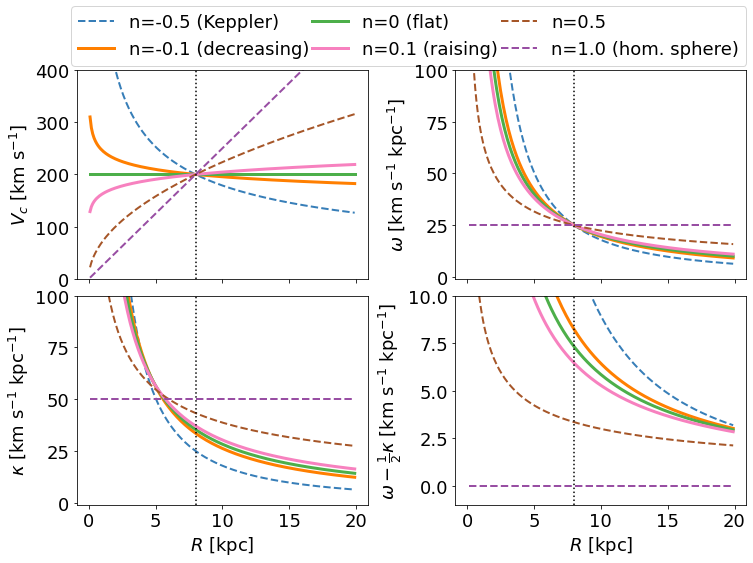

In [25]:
namef="./plots/frequencies"

plt.rcParams['font.size'] = 18
r=np.arange(0.1,20.,.1)
nn=[1.,2.,10.,100.,-10.,-2.]
nn=np.flip(nn)
N=len(nn)
colors = plt.cm.jet(np.linspace(0,1,N))
#colors = plt.cm.viridis(np.linspace(0,1,N))
#colors = plt.cm.gnuplot(np.linspace(0,1,N))

#colors = plt.cm.tab10(np.linspace(0,1,N))
colors=['tab:blue','tab:orange','tab:gree','tab:purple','tab:brown','tab:pink']
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
lw=[2,3,3,3,2,2]
ls=['--','-','-','-','--','--']

nrows=2
ncols=2
fig = plt.figure(constrained_layout=False,figsize=(ncols*6,nrows*4))
gs = fig.add_gridspec(nrows,ncols, hspace=0.08, wspace=0.3)
ax = gs.subplots(sharex=True)

for i in range(0,len(nn)):
    n=nn[i]
    print(n)
    kappa=kappaf(r,n=n)
    omega=omegaf(r,n=n)
    Vc=Vf(r,n=n)
    l='n='+str(1./n)
    if n==100:l='n=0' + ' (flat)'
    if n==1.:l=l+' (hom. sphere)'
    if n==-2.:l=l+' (Keppler)'
    if n==10:l=l+' (raising)'
    if n==-10:l=l+' (decreasing)'

    ax[0,0].plot(r,Vc,label=l,c=colors[i],linewidth=lw[i],linestyle=ls[i])
    ax[0,1].plot(r,omega,c=colors[i],linewidth=lw[i],linestyle=ls[i])
    ax[1,0].plot(r,kappa,c=colors[i],linewidth=lw[i],linestyle=ls[i])
    ax[1,1].plot(r,omega-kappa/2.,c=colors[i],linewidth=lw[i],linestyle=ls[i])
ax[0,0].legend(ncol=3,bbox_to_anchor=(-0.02, 1.02, 2.32, .102), loc=3, mode="expand", borderaxespad=0)

ax[1,0].set_xlabel('$R$ [kpc]')
ax[1,1].set_xlabel('$R$ [kpc]')
ax[0,0].set_ylabel('$V_c$ [km s$^{-1}$]')
ax[0,1].set_ylabel('$\omega$ [km s$^{-1}$ kpc$^{-1}$]')
ax[1,0].set_ylabel('$\kappa$ [km s$^{-1}$ kpc$^{-1}$]')
ax[1,1].set_ylabel(r'$\omega-\frac{1}{2}\kappa$ [km s$^{-1}$ kpc$^{-1}$]')
#ax[1,1].set_ylabel(r'$\omega-\kappa/2$ [km s$^{-1}$ kpc$^{-1}$]')

ax[0,0].axvline(x=8.,linestyle=':',color='k')
ax[0,1].axvline(x=8.,linestyle=':',color='k')
ax[1,0].axvline(x=8.,linestyle=':',color='k')
ax[1,1].axvline(x=8.,linestyle=':',color='k')
#ax[0,0].axhline(y=25,linestyle='--',color='k')

ax[0,0].set_ylim(0,400)
ax[0,1].set_ylim(-1,100)
ax[1,0].set_ylim(-1,100)
ax[1,1].set_ylim(-1,10)

plt.savefig(namef+'.png',  format='png', dpi=300,bbox_inches='tight')

In [4]:
nn=np.arange(-0.5,1.05,0.05)
beta=1/nn

beta[10]=100.
print(nn)
print(beta)

[-5.00000000e-01 -4.50000000e-01 -4.00000000e-01 -3.50000000e-01
 -3.00000000e-01 -2.50000000e-01 -2.00000000e-01 -1.50000000e-01
 -1.00000000e-01 -5.00000000e-02 -1.11022302e-16  5.00000000e-02
  1.00000000e-01  1.50000000e-01  2.00000000e-01  2.50000000e-01
  3.00000000e-01  3.50000000e-01  4.00000000e-01  4.50000000e-01
  5.00000000e-01  5.50000000e-01  6.00000000e-01  6.50000000e-01
  7.00000000e-01  7.50000000e-01  8.00000000e-01  8.50000000e-01
  9.00000000e-01  9.50000000e-01  1.00000000e+00]
[ -2.          -2.22222222  -2.5         -2.85714286  -3.33333333
  -4.          -5.          -6.66666667 -10.         -20.
 100.          20.          10.           6.66666667   5.
   4.           3.33333333   2.85714286   2.5          2.22222222
   2.           1.81818182   1.66666667   1.53846154   1.42857143
   1.33333333   1.25         1.17647059   1.11111111   1.05263158
   1.        ]


In [4]:
def phi(r, t,V_0=240.,n=-10.):
    kappa=kappaf(r,n=n,Vc=Vc)
    omega=omegaf(r,n=n,Vc=Vc)    
    return (omega-kappa/2.)*t/ft

def number_of_wraps(t, rmin, rmax, phase=None,V_0=240.,n=-10.):
    if not phase: phase = np.pi/2
    lowAngle = np.floor((phi(rmin, t,V_0=V_0,n=n) - phase) / (2*np.pi)) * 2*np.pi + phase
    highAngle = np.floor((phi(rmax, t,V_0=V_0,n=n) - phase) / (2*np.pi)) * 2*np.pi + phase
    #return np.int((lowAngle - highAngle) / (2*np.pi))
    return ((lowAngle - highAngle) / (2*np.pi))


24.999999999999996
4.0


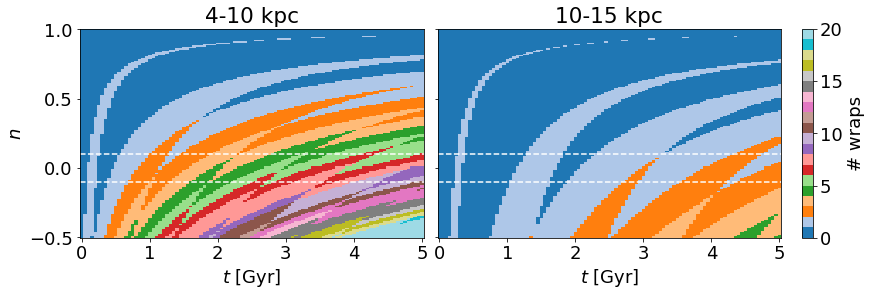

In [10]:
namef="./plots/wraps"

plt.rcParams['font.size'] = 18

Vc=240.
dn=0.01
nn=np.arange(-0.5,1.0+dn,dn)
#nn=np.arange(-0.5,0.+dn,dn)
beta=1./nn


N=len(nn)
colors = plt.cm.jet(np.linspace(0,1,N))
#colors = plt.cm.viridis(np.linspace(0,1,N))
#colors = plt.cm.gnuplot(np.linspace(0,1,N))

#colors = plt.cm.tab10(np.linspace(0,1,N))
colors=['tab:blue','tab:orange','tab:gree','tab:purple','tab:brown','tab:pink']
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

dt=0.05
times=np.arange(0.,5.+dt,dt)
matrix=np.zeros((len(times),len(nn)))
rr=[5,8,15]

rmin=[4,10]
rmax=[10,15]

nrows=1
ncols=len(rmin)
fig = plt.figure(constrained_layout=True,figsize=(ncols*6.,nrows*4.))
gs = fig.add_gridspec(nrows,ncols, hspace=0, wspace=0.)
ax = gs.subplots(sharex=True,sharey=True)

c='white'
for k in range(0,len(rmin)):
    for i in range(0,len(times)):
        for j in range(0,len(nn)):
            n=beta[j]
            w=number_of_wraps(times[i], rmin[k], rmax[k], phase=None,n=n)
            matrix[i,j]=(w)
    print(np.max(matrix))
    vmax=20.
    im1=ax[k].pcolormesh(times, nn,matrix.T,cmap='tab20',vmin=0.,vmax=vmax)#,norm=mcolors.PowerNorm(0.6)tab20c
    #CS=ax[k].contour(times, nn,matrix.T,[0.,1.,2.,4.,10.,20.],vmin=0.,vmax=vmax,colors=c)
    #ax[k].clabel(CS, CS.levels,fmt='%d', inline=True,fontsize=18,colors=c)
    ax[k].set_title(str(rmin[k])+'-'+str(rmax[k])+' kpc')
    ax[k].set_xlabel(r'$t$ [Gyr]')
    ax[k].axhline(y=-0.1,c=c,linestyle='--')
    ax[k].axhline(y=0.1,c=c,linestyle='--')
    ax[k].set_xticks([0,1,2,3,4,5])

ax[0].set_ylabel(r'$n$')
cbar=fig.colorbar(im1, ax=ax[k], location='right', shrink=1.)
cbar.set_label('# wraps')


plt.savefig(namef+'.png',  format='png', dpi=300,bbox_inches='tight')

33.0
9.0


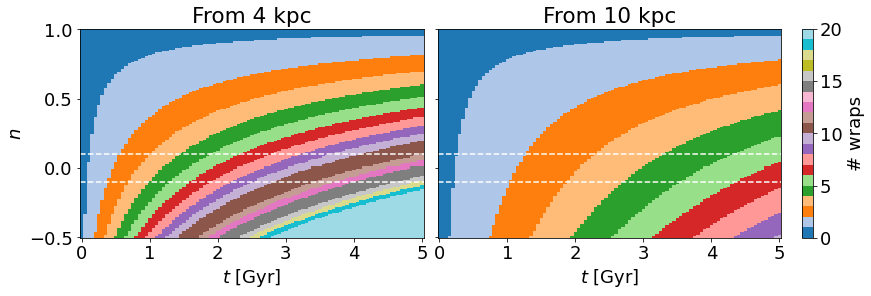

In [5]:

namef="./plots/wraps"

plt.rcParams['font.size'] = 18

Vc=240.
dn=0.01
nn=np.arange(-0.5,1.0+dn,dn)
#nn=np.arange(-0.5,0.+dn,dn)
beta=1./nn


N=len(nn)
colors = plt.cm.jet(np.linspace(0,1,N))
#colors = plt.cm.viridis(np.linspace(0,1,N))
#colors = plt.cm.gnuplot(np.linspace(0,1,N))

#colors = plt.cm.tab10(np.linspace(0,1,N))
colors=['tab:blue','tab:orange','tab:gree','tab:purple','tab:brown','tab:pink']
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

dt=0.05
times=np.arange(0.,5.+dt,dt)
matrix=np.zeros((len(times),len(nn)))
rr=[5,8,15]

rmin=[4,10]
rmax=[100000,150000]

nrows=1
ncols=len(rmin)
fig = plt.figure(constrained_layout=True,figsize=(ncols*6.,nrows*4.))
gs = fig.add_gridspec(nrows,ncols, hspace=0, wspace=0.)
ax = gs.subplots(sharex=True,sharey=True)

c='white'
for k in range(0,len(rmin)):
    for i in range(0,len(times)):
        for j in range(0,len(nn)):
            n=beta[j]
            w=number_of_wraps(times[i], rmin[k], rmax[k], phase=None,n=n)
            matrix[i,j]=(w)
    print(np.max(matrix))
    vmax=20.
    im1=ax[k].pcolormesh(times, nn,matrix.T,cmap='tab20',vmin=0.,vmax=vmax)#,norm=mcolors.PowerNorm(0.6)tab20c
    #CS=ax[k].contour(times, nn,matrix.T,[0.,1.,2.,4.,10.,20.],vmin=0.,vmax=vmax,colors=c)
    #ax[k].clabel(CS, CS.levels,fmt='%d', inline=True,fontsize=18,colors=c)
    ax[k].set_title('From '+str(rmin[k])+' kpc')
    ax[k].set_xlabel(r'$t$ [Gyr]')
    ax[k].axhline(y=-0.1,c=c,linestyle='--')
    ax[k].axhline(y=0.1,c=c,linestyle='--')
    ax[k].set_xticks([0,1,2,3,4,5])

ax[0].set_ylabel(r'$n$')
cbar=fig.colorbar(im1, ax=ax[k], location='right', shrink=1.)
cbar.set_label('# wraps')


plt.savefig(namef+'.png',  format='png', dpi=300,bbox_inches='tight')

25.0
4.0


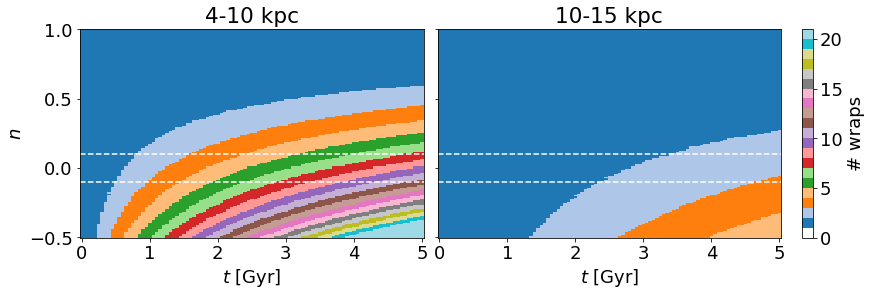

In [29]:
namef="./plots/wraps"

plt.rcParams['font.size'] = 18

Vc=240.
dn=0.01
nn=np.arange(-0.5,1.0+dn,dn)
#nn=np.arange(-0.5,0.+dn,dn)
beta=1./nn


N=len(nn)
colors = plt.cm.jet(np.linspace(0,1,N))
#colors = plt.cm.viridis(np.linspace(0,1,N))
#colors = plt.cm.gnuplot(np.linspace(0,1,N))

#colors = plt.cm.tab10(np.linspace(0,1,N))
colors=['tab:blue','tab:orange','tab:gree','tab:purple','tab:brown','tab:pink']
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

dt=0.05
times=np.arange(0.,5.+dt,dt)
matrix=np.zeros((len(times),len(nn)))
rr=[5,8,15]

rmin=[4,10]
rmax=[10,15]

nrows=1
ncols=len(rmin)
fig = plt.figure(constrained_layout=True,figsize=(ncols*6.,nrows*4.))
gs = fig.add_gridspec(nrows,ncols, hspace=0, wspace=0.)
ax = gs.subplots(sharex=True,sharey=True)

c='white'
for k in range(0,len(rmin)):
    for i in range(0,len(times)):
        for j in range(0,len(nn)):
            n=beta[j]
            #w=number_of_wraps(times[i], rmin[k], rmax[k], phase=None,n=n)
            ws=[number_of_wraps(times[i], rmin[k], rmax[k], phase=ph, n=n) for ph in np.linspace(0,2*np.pi,30)]
            #w = np.round(sum(ws)/len(ws))
            w = max(1,np.round(max(ws)))
            matrix[i,j]=(w)
    print(np.max(matrix))
    vmax=21.
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap([(1,1,1)] + [matplotlib.cm.get_cmap('tab20')(cc) for cc in range(20)])
    im1=ax[k].pcolormesh(times, nn,matrix.T,cmap=cmap,vmin=0.,vmax=vmax)#,norm=mcolors.PowerNorm(0.6)tab20c
    #CS=ax[k].contour(times, nn,matrix.T,[0.,1.,2.,4.,10.,20.],vmin=0.,vmax=vmax,colors=c)
    #ax[k].clabel(CS, CS.levels,fmt='%d', inline=True,fontsize=18,colors=c)
    ax[k].set_title(str(rmin[k])+'-'+str(rmax[k])+' kpc')
    ax[k].set_xlabel(r'$t$ [Gyr]')
    ax[k].axhline(y=-0.1,c=c,linestyle='--')
    ax[k].axhline(y=0.1,c=c,linestyle='--')
    ax[k].set_xticks([0,1,2,3,4,5])

ax[0].set_ylabel(r'$n$')
cbar=fig.colorbar(im1, ax=ax[k], location='right', shrink=1.)
cbar.set_label('# wraps')


namef='wraps'
plt.savefig(namef+'.png',  format='png', dpi=300,bbox_inches='tight')

<ipython-input-5-d21d21cdf754>:50: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1=ax[jj].pcolormesh(times, nn,matrix.T,cmap='tab20c',vmin=0,vmax=50)#,norm=mcolors.PowerNorm(0.6)



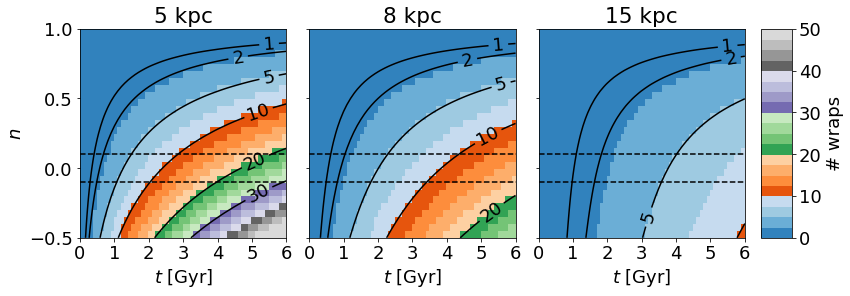

In [5]:
namef="./plots/wraps"

plt.rcParams['font.size'] = 18

r=np.arange(0.1,15.,.1)
Vc=240.
nn=np.arange(-0.5,1.05,0.05)
beta=1./nn

beta[10]=100.

N=len(nn)
colors = plt.cm.jet(np.linspace(0,1,N))
#colors = plt.cm.viridis(np.linspace(0,1,N))
#colors = plt.cm.gnuplot(np.linspace(0,1,N))

#colors = plt.cm.tab10(np.linspace(0,1,N))
colors=['tab:blue','tab:orange','tab:gree','tab:purple','tab:brown','tab:pink']
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']


times=np.arange(0.,6.1,0.1)
matrix=np.zeros((len(times),len(nn)))
rr=[5,8,15]


nrows=1
ncols=len(rr)
fig = plt.figure(constrained_layout=True,figsize=(ncols*3.9,nrows*4.))
gs = fig.add_gridspec(nrows,ncols, hspace=0, wspace=0.)
ax = gs.subplots(sharex=True,sharey=True)

for jj in range(len(rr)):
    r=rr[jj]
    for i in range(0,len(nn)):
        n=beta[i]
        kappa=kappaf(r,n=n,Vc=Vc)
        omega=omegaf(r,n=n,Vc=Vc)
        V=Vf(r,n=n,Vc=Vc)
        l=str(n)
        phim0=-np.pi/2.
        phim=(omega-kappa/2.)*times/ft+phim0
        matrix[:,i]=(phim/(np.pi))
    d1=np.shape(matrix)[0]
    d2=np.shape(matrix)[1]
    #for a,b in zip(range(d1),range(d2)):
    #    matrix[a,b]=int(matrix[a,b])
    im1=ax[jj].pcolormesh(times, nn,matrix.T,cmap='tab20c',vmin=0,vmax=50)#,norm=mcolors.PowerNorm(0.6)
    #line_colors = ['black' for l in cpf.levels]
    CS=ax[jj].contour(times, nn,matrix.T,[1,2,5,10,20,30],vmin=0,vmax=50,colors='k')
    ax[jj].clabel(CS, CS.levels,fmt='%d', inline=True,fontsize=18)
    ax[jj].set_title(str(r)+' kpc')
    ax[jj].set_xlabel(r'$t$ [Gyr]')
    ax[jj].axhline(y=-0.1,c='k',linestyle='--')
    ax[jj].axhline(y=0.1,c='k',linestyle='--')
ax[0].set_ylabel(r'$n$')
ax[0].set_xticks([0,1,2,3,4,5,6])

cbar=fig.colorbar(im1, ax=ax[2], location='right', shrink=1.)
cbar.set_label('# wraps')


plt.savefig(namef+'.png',  format='png', dpi=300,bbox_inches='tight')

In [26]:
times=np.arange(0.,3.1,0.5)
nn=np.arange(-0.1,0.15,0.05)
beta=1./nn
r=8.
matrix=np.zeros((len(times),len(nn)))
for i in range(0,len(nn)):
    n=beta[i]
    kappa=kappaf(r,n=n,Vc=Vc)
    omega=omegaf(r,n=n,Vc=Vc)
    V=Vf(r,n=n,Vc=Vc)
    l=str(n)
    phim0=np.pi/2.
    phim=(omega-kappa/2.)*times/ft+phim0
    matrix[:,i]=(phim/(2.*np.pi))
        
d1=np.shape(matrix)[0]
d2=np.shape(matrix)[1]
for b in (range(d2)):
    for a in (range(d1)):
        print(np.round(nn[b],2),np.round(times[a],1),np.round(matrix[a,b],1))

/tmp/ipykernel_161326/4018822141.py:3: RuntimeWarning: divide by zero encountered in true_divide
  beta=1./nn



ValueError: operands could not be broadcast together with shapes (199,) (7,) 

In [26]:
def orbits(R0,phi0,t,rper=1.,Dve=10.,epsilon=1.,m=0.,Vc=200.,n=-10.,hr=8.,D=20.):
    
    #case m=0 and n=inf (flat rotation curve)
    #Rg,A,psi,kappa,omega,gamma=IC0(R0,phi0,t,rper=2.,Dve=10.,Vc=200.)
    
    #DVR,DVphi=impact(R0,phi0,rper=rper,Dve=Dve,epsilon=epsilon,m=m,Vc=Vc,n=n,hr=hr)
    DVR,DVphi=impact2d(R0,phi0,D=D,Dve=Dve)
    
    Rg,A,psi,kappa,omega,gamma=IC(R0,DVR,DVphi,Vc=Vc,n=n,hr=hr)
    
    R,VR,phi,Vphi,phi2=orbit(Rg,A,phi0,psi,kappa,omega,gamma,t)
    
    return R,VR,phi,Vphi,phi2



/home/hpc/code/fourier/orbit_functions.py:88: RuntimeWarning: divide by zero encountered in true_divide
  sinalpha=rper*np.sin(phi0)/dist

/home/hpc/code/fourier/orbit_functions.py:89: RuntimeWarning: invalid value encountered in arcsin
  alpha=np.arcsin(sinalpha)



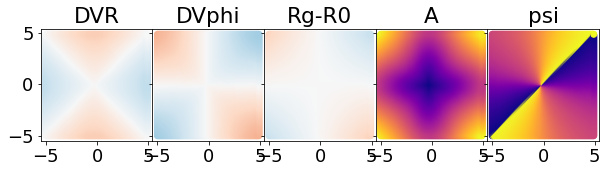

In [27]:
r00=np.arange(2,5,0.1)
phi00=np.arange(0,2*np.pi,0.1)
r0=np.repeat(r00,len(phi00))
phi0=np.tile(phi00,len(r00))
x0=r0*np.cos(phi0)
y0=r0*np.sin(phi0)

x00=np.arange(-5,5,0.1)
y00=np.arange(-5,5,0.1)
x0=np.repeat(x00,len(y00))
y0=np.tile(y00,len(x00))

R0=np.sqrt(x0**2.+y0**2.)
phi0=np.arctan2(y0,-x0)#origin at x<0 axis and positive counterclockwise

DVR,DVphi=impact(R0,phi0)
DVR,DVphi=impact2d(R0,phi0,D=20.,Dve=10.)
Rg,A,psi,kappa,omega,gamma=IC(R0,DVR,DVphi,Vc=240,n=-10.,hr=8.)

nrows=1
ncol=5
fig = plt.figure(constrained_layout=False,figsize=(nrows*10,ncol*5))
gs = fig.add_gridspec(nrows,ncol, hspace=0, wspace=0.)
ax = gs.subplots(sharex=True,sharey=True)

ax[0].scatter(x0,y0,c=DVR,cmap='RdBu',vmin=-10,vmax=10)
ax[0].set_title('DVR')
ax[0].set_aspect('equal')
ax[1].scatter(x0,y0,c=DVphi,cmap='RdBu',vmin=-10,vmax=10)
ax[1].set_title('DVphi')
ax[1].set_aspect('equal')
#ax[2].scatter(x0,y0,c=np.rad2deg(alpha),cmap='RdBu')
ax[2].scatter(x0,y0,c=(Rg-R0),cmap='RdBu',vmin=-0.5,vmax=0.5)
ax[2].set_title('Rg-R0')
ax[2].set_aspect('equal')
ax[3].scatter(x0,y0,c=A,cmap='plasma')
ax[3].set_title('A')
ax[3].set_aspect('equal')
ax[4].scatter(x0,y0,c=np.rad2deg(psi),cmap='plasma')
ax[4].set_title('psi')
ax[4].set_aspect('equal')

In [28]:
#check initial conditions
t0=np.arange(0.,2.,0.00001)/ft

R0=1.
phi0=np.deg2rad(97.)

Rg,A,psi,kappa,omega,gamma=IC(R0,DVR,DVphi,Vc=240,n=100.,hr=8.)
omega0=omegaf(R0,Vc=240.,n=100.,hr=8.)
VR0=0.
Vphi0=omega0*R0
print(R0,phi0,VR0,Vphi0)

DVR,DVphi=impact(R0,phi0)
DVR,DVphi=impact2d(R0,phi0,D=20.,Dve=10.)
VR0=DVR
print('DVR,DVphi',DVR,DVphi)
Vphi0=Vphi0+DVphi

print('initial',R0,phi0,VR0,Vphi0)

r,vr,phi,vphi,phi2=orbits(R0,phi0,t0,rper=20.,Dve=10.,epsilon=1.,m=0.,Vc=240.,n=100.,hr=8.,D=20.)

print('final',r[0],phi[0],vr[0],vphi[0])

print('xy')
print(-r[0]*np.cos(phi[0]), r[0]*np.sin(phi[0]))

1.0 1.6929693744344996 0.0 240.0
DVR,DVphi -0.48514786313799824 0.12096094779983375
initial 1.0 1.6929693744344996 -0.48514786313799824 240.12096094779983


NameError: name 'orbits' is not defined

In [29]:
n=1.1
Vc=240.
hr=8.

In [23]:
#for plots as a function of space
t=np.arange(0,2,0.01)/ft
R0=np.arange(2,5,0.01)
phi0=np.arange(0,2*np.pi,0.01)

t=np.arange(0.,5.,0.05)/ft#originally in Gyr and then devided by ft
R0=np.arange(2,15,0.02)
phi0=np.arange(0,2*np.pi,0.02)

R0=np.arange(4.,15.,0.02)
phi0=np.deg2rad(np.arange(0.,360,0.5))

t=np.arange(0.,5.,0.1)/ft#originally in Gyr and then devided by ft
R0=np.arange(1,15.,0.03)
phi0=np.deg2rad(np.arange(0.,360,0.8))


rt=np.zeros((len(t),len(R0),len(phi0)))
vrt=rt.copy()
phit=rt.copy()
vphit=rt.copy()
phi2t=rt.copy()
print(np.shape(rt))

for i in range(len(R0)):
    for j in range(len(phi0)):
        #rt[:,i,j],vrt[:,i,j],phit[:,i,j],vphit[:,i,j]=orbit(r0[i],phi0[j],t,Vc=200,n=10.,hr=5.,rstar=2.,Dve=10.,epsilon=1.,m=0)
        rt[:,i,j],vrt[:,i,j],phit[:,i,j],vphit[:,i,j],phi2t[:,i,j]=orbits(R0[i],phi0[j],t,rper=20.,Dve=10.,epsilon=1.,m=0.,Vc=Vc,n=n,hr=hr,D=20.)
        if vphit[0,i,j]==0.:print(R0[i],phi0[j])
#left-handed:
xt=-rt[:,:,:]*np.cos(phit[:,:,:])
yt=rt[:,:,:]*np.sin(phit[:,:,:])
Lzt=rt*vphit

(50, 467, 450)


NameError: name 'orbits' is not defined

In [579]:
#for plots as a function of space
t=np.arange(0,4,0.1)/ft
x0=np.arange(-15,15.+0.1,0.1)
y0=np.arange(-15,15.,0.1)

rt=np.zeros((len(t),len(x0),len(y0)))
vrt=rt.copy()
phit=rt.copy()
vphit=rt.copy()
phi2t=rt.copy()
print(np.shape(rt))

for i in range(len(x0)):
    for j in range(len(y0)):
        R0=np.sqrt(x0[i]*x0[i]+y0[j]*y0[j])
        phi0=np.arctan2(-y0[j],-x0[i])
        #rt[:,i,j],vrt[:,i,j],phit[:,i,j],vphit[:,i,j]=orbit(r0[i],phi0[j],t,Vc=200,n=10.,hr=5.,rstar=2.,Dve=10.,epsilon=1.,m=0)
        rt[:,i,j],vrt[:,i,j],phit[:,i,j],vphit[:,i,j],phi2t[:,i,j]=orbits(R0,phi0,t,rper=20.,Dve=10.,epsilon=1.,m=0.,Vc=Vc,n=n,hr=hr,D=20.)
        if vphit[0,i,j]==0.:print(R0,phi0)
#left-handed:
xt=-rt[:,:,:]*np.cos(phit[:,:,:])
yt=rt[:,:,:]*np.sin(phit[:,:,:])
Lzt=rt*vphit

(40, 301, 300)


(4, 3)


NameError: name 't' is not defined

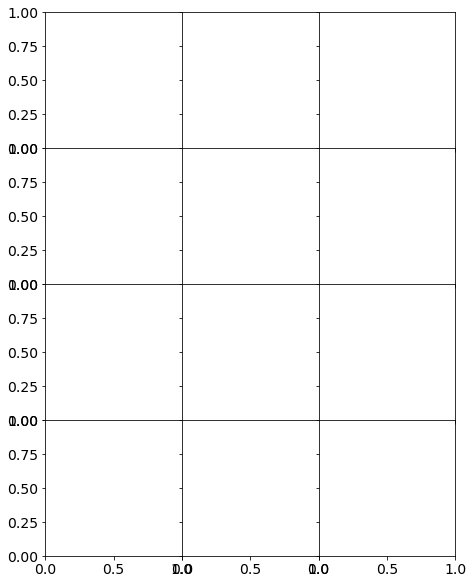

In [22]:
times=[0,0.1,0.3,0.5,1,1.5,3]
times=[0,0.1,0.5,1.]
plt.rcParams['font.size'] = 14

nrows=len(times)
ncols=3
fig = plt.figure(constrained_layout=False,figsize=(ncols*2.45,nrows*2.5))
gs = fig.add_gridspec(nrows,ncols, hspace=0., wspace=0.)
ax = gs.subplots(sharex=True,sharey=True)
print(np.shape(ax))
    
for time,i in zip(times,range(len(times))):
    
    T=time/ft
    tt= np.abs(t - T).argmin()
    print(tt)
    
    x,y,VR,Vphi,R,Lz,phi=xt[tt,:,:].flatten(),yt[tt,:,:].flatten(),vrt[tt,:,:].flatten(),vphit[tt,:,:].flatten(),rt[tt,:,:].flatten(),Lzt[tt,:,:].flatten(),phit[tt,:,:].flatten()
    phi=phi%(2.*np.pi)
    
    bins=100
    Xmax=15.
    DX=0.1
    binsX=np.arange(-1.*Xmax,Xmax+DX,DX)
    binsY=binsX
    Rmax=18.
    binsR=np.arange(0.,Rmax+DX,DX)
    mVR,xedge,yedge,binnumber=stats.binned_statistic_2d(x,y, VR, statistic='mean', bins=[binsX,binsY])    
    mVphi,xedge,yedge,binnumber=stats.binned_statistic_2d(x,y, Vphi, statistic='mean', bins=[binsX,binsY])
    
    #fractional change in Vphi with respect to average in that radius
    binsR=np.arange(0.,Rmax+DX,DX)
    m2,redges0,binnumber=stats.binned_statistic(R,Vphi,bins=[binsR], statistic='mean')
    rcenter0= redges0[1:] - DX/2.
    for ii in range(len(xedge)-1):
        for jj in range(len(yedge)-1):
            rr=np.sqrt((xedge[ii].T)**2.+(yedge[jj])**2.)
            idx = (np.abs(rcenter0 - rr)).argmin()
            mVphi[ii,jj]=(mVphi[ii,jj]-m2[idx])
            
    DX=0.5
    binsX=np.arange(-1.*Xmax,Xmax+DX,DX)
    binsR=np.arange(0.,Rmax+DX,DX)
    binsY=binsX
    #ax[i,0].hist2d(x,y, bins=[binsX,binsY])
    hist, bin_edges = np.histogram(R,bins=binsR,density=True)
    norm=1./hist
    indw=np.digitize(R,bins=binsR)-1
    #weights=norm[indw]
    h0,xedges,yedges=np.histogram2d(x,y,bins=[binsX,binsY])#,weights=weights  
    h5=gaussian_filter(h0, 1)#, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)[source]¶
    h10=gaussian_filter(h0, 4)#, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)[source]¶
    h=h0-h10
    h=h0/h10-1. 
    #h=h5/h10-1. 
    im0=ax[i,0].pcolormesh(xedges, yedges, h.T)#,norm=mcolors.PowerNorm(0.6)

    
    #ax[i,0].scatter(x,y,s=0.01)
    #ax[i,0].set_title(str(time))
    ax[i,0].text(-10., 9, str(time)+' Gyr',color='white',fontsize=18.)


    im1 = ax[i,1].pcolormesh(xedge,yedge, mVR.T, cmap='RdBu',vmin=-10,vmax=10)#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)

    im2 = ax[i,2].pcolormesh(xedge,yedge, mVphi.T, cmap='RdBu',vmin=-10,vmax=10)#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)
    
    for jj in range(3):
        ax[i,jj].set_xlim(-13,13)
        ax[i,jj].set_ylim(-13,13)
        ax[i,jj].set_aspect('equal')
    ax[len(times)-1,0].set_xlabel('$X$ [kpc]')
    ax[len(times)-1,0].set_ylabel('$Y$ [kpc]')

    ax[0,0].set_title('Model 0', y=1.2)
    #ind=abs(phi)<0.3
    #h,xe,ye,im=ax[i,3].hist2d(R[ind],Vphi[ind], bins=bins)
    #ax[i,3].set_xlim(4.5,14)
    #ax[i,3].set_ylim(195,205)
    
    rr=np.arange(1.,15,0.1)
    kappa=kappaf(rr,n=n,Vc=Vc)
    omega=omegaf(rr,n=n,Vc=Vc)
    
    phim0=-np.pi/2.
    phim=(omega-kappa/2.)*time/ft+phim0
    phimwrap=(phim+ np.pi) % (2 * np.pi) - np.pi
    xx=rr*np.cos(phimwrap)
    yy=-rr*np.sin(phimwrap)
    #ax[i,1].plot(phim,r,'o',c='k')
    #ax[i,0].plot(xx,yy,'o',c='k',markersize=3)
    #ax[i,1].plot(xx,yy,'o',c='k',markersize=3)
    #ax[i,2].plot(xx,yy,'o',c='k',markersize=3)
    #ax[i,0].plot(-xx,-yy,'o',c='grey',markersize=3)
    #ax[i,1].plot(-xx,-yy,'o',c='grey',markersize=3)
    #ax[i,2].plot(-xx,-yy,'o',c='grey',markersize=3)
    
    ax[i,0].plot(xx,yy,c='k',linestyle=':')
    ax[i,1].plot(xx,yy,c='k',linestyle=':')
    ax[i,2].plot(xx,yy,c='k',linestyle=':')
    
    ax[i,0].plot(-xx,-yy,c='w',linestyle=':')
    ax[i,1].plot(-xx,-yy,c='w',linestyle=':')
    ax[i,2].plot(-xx,-yy,c='w',linestyle=':')

plt.draw()
p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[0,1].get_position().get_points().flatten()
p2 = ax[0,2].get_position().get_points().flatten()
#ax_cbar = fig.add_axes([p0[0], 0, p1[2]-p0[0], 0.05])
#plt.colorbar(sc1, cax=ax_cbar, orientation='horizontal')
#[left, bottom, width, height]
ax_cbar1 = fig.add_axes([p1[0], p2[3], p1[2]-p1[0], 0.02])
cb1=plt.colorbar(im1, cax=ax_cbar1, orientation='horizontal') 
cb1.ax.xaxis.set_ticks_position("top")
cb1.ax.xaxis.set_label_position('top')   
cb1.set_label(r'$V_R$ [km s$^{-1}$]')
cb1.ax.xaxis.set_ticks([-5,0,5])
ax_cbar2 = fig.add_axes([p2[0], p2[3], p2[2]-p2[0], 0.02])
cb2=plt.colorbar(im2, cax=ax_cbar2, orientation='horizontal')        
cb2.ax.xaxis.set_ticks_position("top")
cb2.ax.xaxis.set_label_position('top')   
cb2.ax.xaxis.set_ticks([-5,0,5])
cb2.set_label(r'$V_\phi-V_c$ [km s$^{-1}$]')

namef='plots/xymodel0.png'
plt.savefig(namef, bbox_inches='tight')
    

(4, 3)
0
0.0 6.2692226731636325
1
1.5492974344333277e-05 6.2831830203348185
5
7.090572040624465e-08 6.2831588674801555
10
1.1965147120207575e-05 6.283179957061673
<ipython-input-542-d7f023601935>:40: RuntimeWarning: invalid value encountered in true_divide
  h=h0/h10-1.



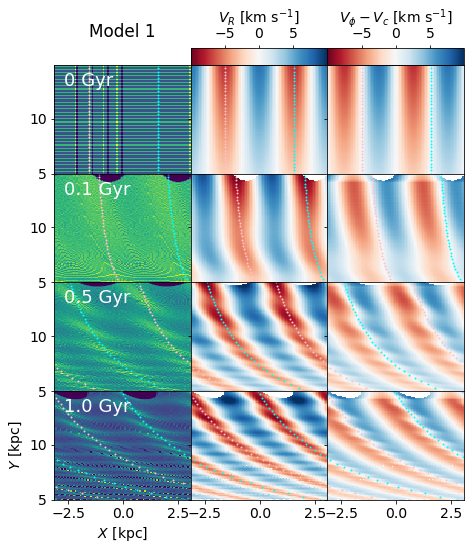

In [542]:
times=[0,0.1,0.5,1.]
plt.rcParams['font.size'] = 14

nrows=len(times)
ncols=3
fig = plt.figure(constrained_layout=False,figsize=(ncols*2.45,nrows*2.))
gs = fig.add_gridspec(nrows,ncols, hspace=0., wspace=0.)
ax = gs.subplots(sharex=True,sharey=True)
print(np.shape(ax))
    
for time,i in zip(times,range(len(times))):
    T=time/ft
    tt= np.abs(t - T).argmin()
    print(tt)
    
    x,y,VR,Vphi,R,Lz,phi=xt[tt,:,:].flatten(),yt[tt,:,:].flatten(),vrt[tt,:,:].flatten(),vphit[tt,:,:].flatten(),rt[tt,:,:].flatten(),Lzt[tt,:,:].flatten(),phit[tt,:,:].flatten()
    phi=phi%(2.*np.pi)
    print(min(phi),max(phi))
    phi[phi>np.pi]=phi[phi>np.pi]-2.*np.pi
    
    binsphi=np.deg2rad(np.arange(-180,180,4.))
    binsR=(np.arange(5,15,0.1))
    bins=[binsphi,binsR]
    #print(len(x))
    #print(len(y))
    #print(len(VR))
    mVR,xedge,yedge,binnumber=stats.binned_statistic_2d(phi,R, VR, statistic='mean', bins=bins)
    mVphi,xedge,yedge,binnumber=stats.binned_statistic_2d(phi,R, Vphi, statistic='mean', bins=bins)
    m2,redges0,binnumber=stats.binned_statistic(R,Vphi,bins=[binsR], statistic='mean')
    rcenter0= redges0[1:] - DX/2.
    for jj in range(len(yedge)-1):
            mVphi[:,jj]=(mVphi[:,jj]-m2[jj])
            
            
    h0,xedges,yedges=np.histogram2d(x,y,bins=[binsX,binsY])#,weights=weights  
    h0,xedges,yedges=np.histogram2d(x,y,bins=100)#,weights=weights  
    h5=gaussian_filter(h0, 1)#, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)[source]¶
    h10=gaussian_filter(h0, 4)#, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)[source]¶
    h=h0-h10
    h=h0/h10-1. 
    #h=h5/h10-1. 
    im0=ax[i,0].pcolormesh(xedges, yedges, h0.T)#,norm=mcolors.PowerNorm(0.6)

    im1 = ax[i,1].pcolormesh(xedge,yedge, mVR.T, cmap='RdBu',vmin=-10,vmax=10)#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)
   
    im2 = ax[i,2].pcolormesh(xedge,yedge, mVphi.T, cmap='RdBu',vmin=-10,vmax=10)#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)

    for jj in range(3):
        ax[i,jj].set_xlim(-13,13)
        ax[i,jj].set_ylim(-13,13)
    ax[len(times)-1,0].set_xlabel('$X$ [kpc]')
    ax[len(times)-1,0].set_ylabel('$Y$ [kpc]')

    ax[0,0].set_title('Model 1', y=1.2)
    ax[i,0].text(-2.7,13, str(time)+' Gyr',color='white',fontsize=18.)
        
    im0=ax[i,0].hist2d(phi,R, bins=bins)
    im1=ax[i,1].pcolormesh(xedge,yedge, mVR.T, cmap='RdBu',vmin=-10,vmax=10)#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)
    im2=ax[i,2].pcolormesh(xedge,yedge, mVphi.T, cmap='RdBu',vmin=-10,vmax=10)#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)

    rr=np.arange(5,15,0.3)
    kappa=kappaf(rr,n=n,Vc=Vc)
    omega=omegaf(rr,n=n,Vc=Vc)    
    phim0=-np.pi/2.
    phim=(omega-kappa/2.)*time/ft+phim0
    phim2=(omega-kappa/2.)*time/ft+phim0+np.pi
    phimwrap=(phim+ np.pi) % (2 * np.pi) - np.pi
    phimwrap2=(phim2+ np.pi) % (2 * np.pi) - np.pi
    #ax[i,0].plot(phimwrap,rr,'o',c='pink',markersize=1)
    #ax[i,1].plot(phimwrap,rr,'o',c='pink',markersize=1)
    #ax[i,2].plot(phimwrap,rr,'o',c='pink',markersize=1)
    #ax[i,0].plot(phimwrap2,rr,'o',c='cyan',markersize=1)
    #ax[i,1].plot(phimwrap2,rr,'o',c='cyan',markersize=1)
    #ax[i,2].plot(phimwrap2,rr,'o',c='cyan',markersize=1)     
    ax[i,0].plot(phimwrap,rr,'o',c='pink',markersize=1)
    ax[i,1].plot(phimwrap,rr,'o',c='pink',markersize=1)
    ax[i,2].plot(phimwrap,rr,'o',c='pink',markersize=1)
    ax[i,0].plot(phimwrap2,rr,'o',c='cyan',markersize=1)
    ax[i,1].plot(phimwrap2,rr,'o',c='cyan',markersize=1)
    ax[i,2].plot(phimwrap2,rr,'o',c='cyan',markersize=1)   
    
    
    
plt.draw()
p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[0,1].get_position().get_points().flatten()
p2 = ax[0,2].get_position().get_points().flatten()
#ax_cbar = fig.add_axes([p0[0], 0, p1[2]-p0[0], 0.05])
#plt.colorbar(sc1, cax=ax_cbar, orientation='horizontal')
#[left, bottom, width, height]
ax_cbar1 = fig.add_axes([p1[0], p2[3], p1[2]-p1[0], 0.03])
cb1=plt.colorbar(im1, cax=ax_cbar1, orientation='horizontal') 
cb1.ax.xaxis.set_ticks_position("top")
cb1.ax.xaxis.set_label_position('top')   
cb1.set_label(r'$V_R$ [km s$^{-1}$]')
cb1.ax.xaxis.set_ticks([-5,0,5])
ax_cbar2 = fig.add_axes([p2[0], p2[3], p2[2]-p2[0], 0.03])
cb2=plt.colorbar(im2, cax=ax_cbar2, orientation='horizontal')        
cb2.ax.xaxis.set_ticks_position("top")
cb2.ax.xaxis.set_label_position('top')   
cb2.ax.xaxis.set_ticks([-5,0,5])
cb2.set_label(r'$V_\phi-V_c$ [km s$^{-1}$]')

namef='plots/Rphimodel0a.png'
plt.savefig(namef, bbox_inches='tight')
    

0
1
2
3
4
5
10
15
30


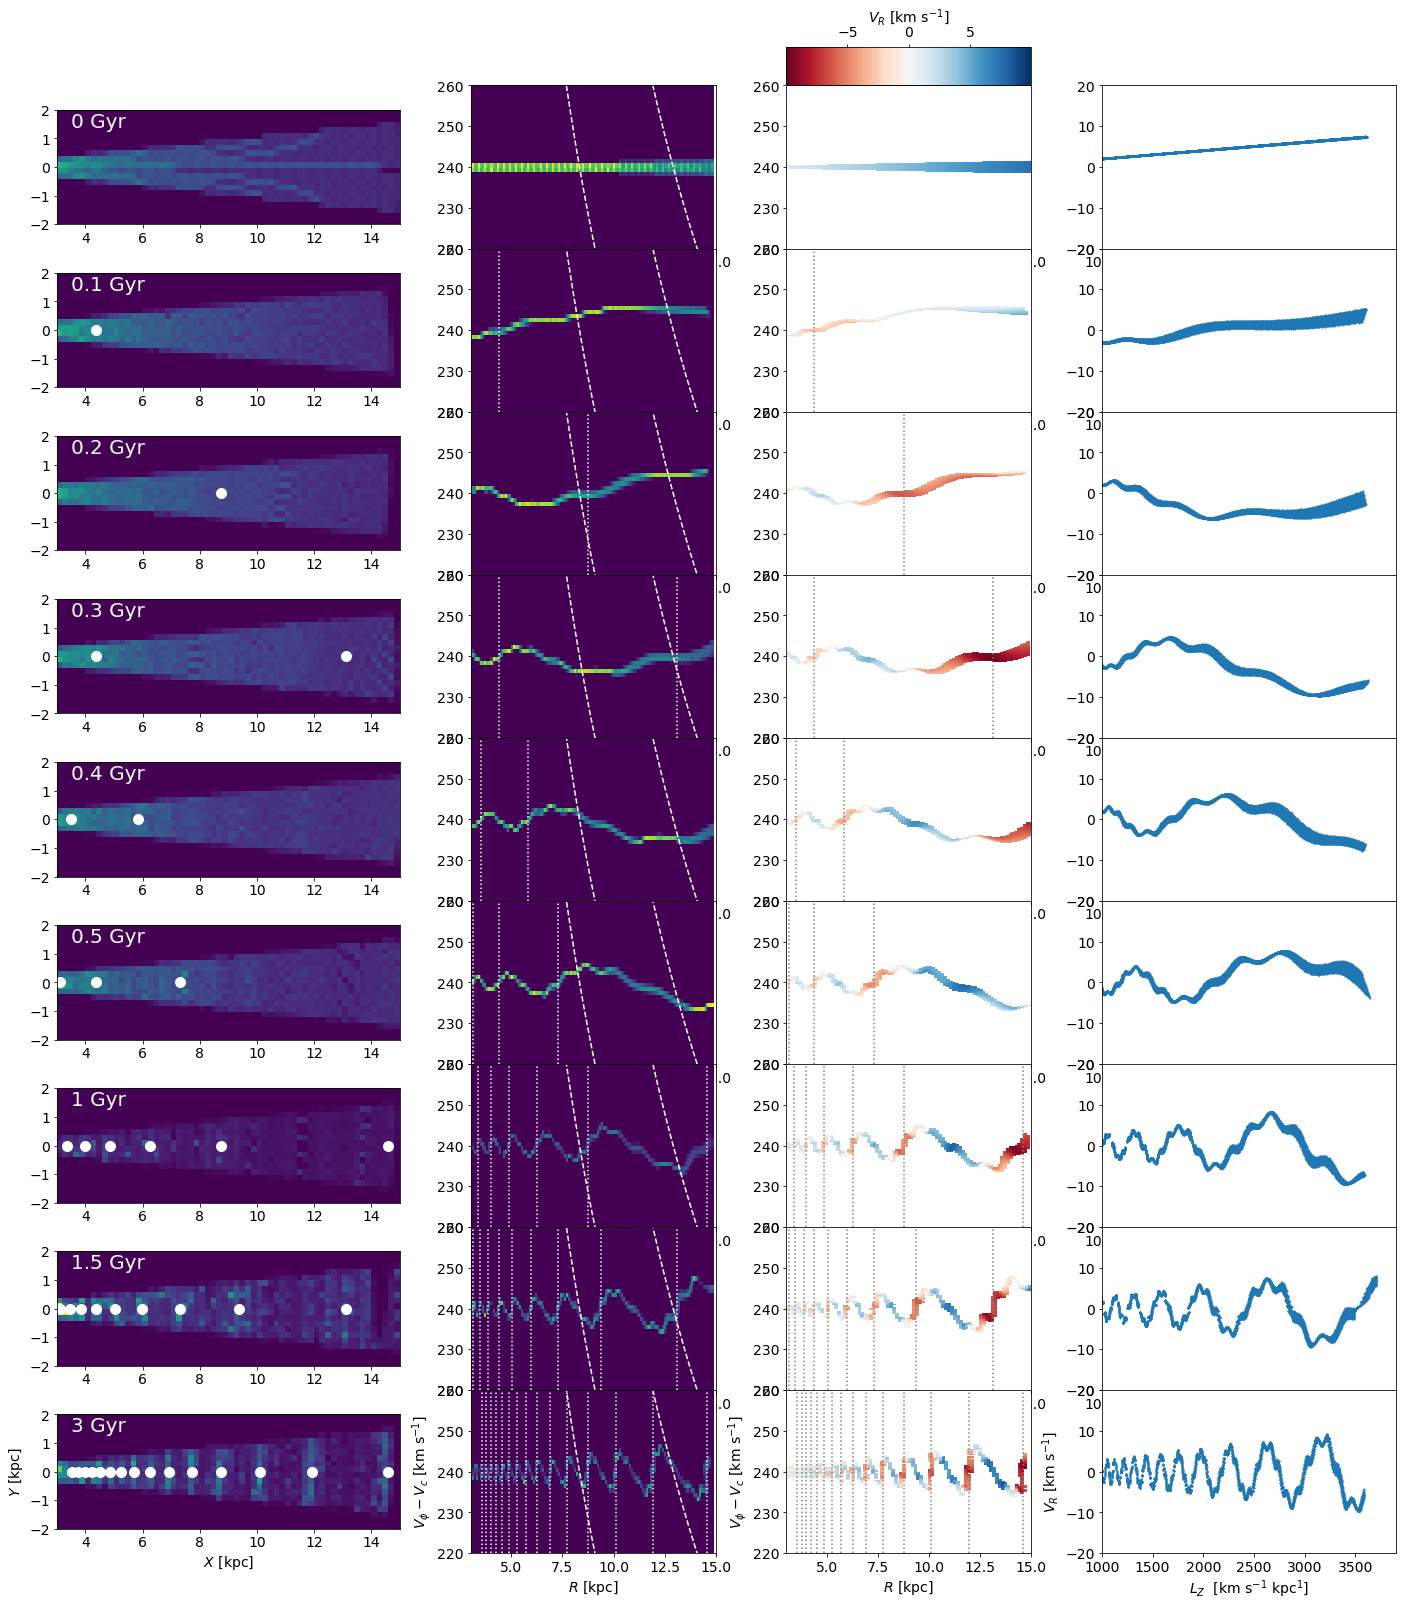

In [573]:
times=[0,0.1,0.2,0.3,0.4,0.5,1,1.5,3]

nrows=len(times)
ncols=4
fig = plt.figure(constrained_layout=False,figsize=(ncols*6,nrows*3))
gs = fig.add_gridspec(nrows,ncols, hspace=0., wspace=0.25,width_ratios=[1.4,1,1,1.2])
ax = gs.subplots()

for time,i in zip(times,range(len(times))):
    T=time/ft
    tt= np.abs(t - T).argmin()
    print(tt)
    
    x,y,VR,Vphi,R,Lz,phi=xt[tt,:,:].flatten(),yt[tt,:,:].flatten(),vrt[tt,:,:].flatten(),vphit[tt,:,:].flatten(),rt[tt,:,:].flatten(),Lzt[tt,:,:].flatten(),phit[tt,:,:].flatten()
    phi=phi%(2.*np.pi)
    
    #indphi=(xt[tt,:,:]>0)&(abs(yt[tt,:,:])<1)
    indphi=np.abs(phi)<0.35
    indphi=(np.abs(phi)>np.pi-0.1)&(np.abs(phi)<np.pi+0.1)

    x,y,VR,Vphi,R,Lz,phi=x[indphi],y[indphi],VR[indphi],Vphi[indphi],R[indphi],Lz[indphi],phi[indphi]

  
    bins=100
    #print(len(x))
    #print(len(y))
    #print(len(VR))
    m1,xedge1,yedge1,binnumber=stats.binned_statistic_2d(R,Vphi, VR, statistic='mean', bins=bins)
    m2,xedge2,yedge2,binnumber=stats.binned_statistic_2d(Lz,VR, Vphi, statistic='mean', bins=bins)

    DX=0.2
    Xmax=15
    binsX=np.arange(0,Xmax+DX,DX)
    binsY=np.arange(-2,2+DX,DX)
    
    ax[i,0].hist2d(x,y, bins=[binsX,binsY])
    ax[i,0].set_aspect('equal') 
    #ax[i,0].hist(R, bins=60)
    #ax[i,0].scatter(x,y,s=1.)
    #ax[i,0].set_xlim(2,15)
    #ax[i,0].set_ylim(200,280)
    #ax[i,0].text(5., 270, str(time)+' Gyr',color='white',fontsize=20.)
    
    binsR=np.arange(0,15,0.1)
    binsVphi=np.arange(200,280,1)

    ax[i,1].hist2d(R,Vphi, bins=[binsR,binsVphi])
    #ax[i,1].scatter(R,Vphi,s=1.)

    ax[i,0].text(3.5, 1.4, str(time)+' Gyr',color='white',fontsize=20.)
    
    Rx=np.arange(0.1,15,0.1)
    ax[i,1].plot(Rx,2000/Rx,c='w',linestyle='--')
    ax[i,1].plot(Rx,3100/Rx,c='w',linestyle='--')
    
    phii=np.arange(np.pi,20*np.pi,np.pi)
    phim0=-np.pi #VR positive
    phim0=np.pi/2. #VR negative
    if n>99:# only for Vc flat
        Rii=Vc*(1.-np.sqrt(2)/2)*time/ft*(1./(phii-phim0))    
    if n<99:# only for Vc flat
        Rii=phii.copy()
        for ii,p in zip(range(len(phii)),phii):
            data=[Vc,n,hr,time,phim0,p]
            F2_partial = partial(F2, data)
            try:
                Rii[ii] = broyden2(F2_partial, 2., f_tol=1e-14)
            except:
                Rii[ii] = "NaN"
        #print(Rii)
    
    Rii=Rii[Rii>3.]
    ax[i,0].plot(Rii,Rii*0.,'o',markersize=10,color='w')
    #ax[i,1].plot(Rii,Rii*omegaf(Rii,n=n,hr=hr,Vc=Vc),'o',markersize=10)
    #ax[i,2].plot(Rii,Rii*omegaf(Rii,n=n,hr=hr,Vc=Vc),'o',markersize=10)
    
    for a in Rii:
        ax[i,1].axvline(a,c='w',linestyle=':')
        ax[i,2].axvline(a,c='grey',linestyle=':')

    im = ax[i,2].pcolormesh(xedge1,yedge1, m1.T, cmap='RdBu',vmin=-10,vmax=10)#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)

    ax[i,0].set_xlim(3,15)
    for jj in range(1,3):
        ax[i,jj].set_xlim(3,15)
        ax[i,jj].set_ylim(220,260)

    ax[i,3].scatter(Lz,VR,s=1.)
    #im = ax[i,2].pcolormesh(xedge2,yedge2, m2.T, cmap='RdBu')#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)
    ax[i,3].set_xlim(1000,3900)
    ax[i,3].set_ylim(-20,20)
    

last=len(times)-1
ax[last,0].set_xlabel(r'$X$ [kpc]')
ax[last,1].set_xlabel(r'$R$ [kpc]')
ax[last,2].set_xlabel(r'$R$ [kpc]')
ax[last,3].set_xlabel(r'$L_Z$  [km s$^{-1}$ kpc$^{1}$]')

ax[last,0].set_ylabel(r'$Y$ [kpc]')
ax[last,1].set_ylabel(r'$V_\phi-V_c$ [km s$^{-1}$]')
ax[last,2].set_ylabel(r'$V_\phi-V_c$ [km s$^{-1}$]')
ax[last,3].set_ylabel(r'$V_R$ [km s$^{-1}$]')

plt.draw()
p0 = ax[0,0].get_position().get_points().flatten()
p1 = ax[0,1].get_position().get_points().flatten()
p2 = ax[0,2].get_position().get_points().flatten()
p3 = ax[0,3].get_position().get_points().flatten()
ax_cbar1 = fig.add_axes([p2[0], p2[3], p2[2]-p2[0], 0.02])
cb1=plt.colorbar(im1, cax=ax_cbar1, orientation='horizontal') 
cb1.ax.xaxis.set_ticks_position("top")
cb1.ax.xaxis.set_label_position('top')   
cb1.set_label(r'$V_R$ [km s$^{-1}$]')
cb1.ax.xaxis.set_ticks([-5,0,5])


namef='plots/ridgesmodel0a.png'
plt.savefig(namef, bbox_inches='tight')

10


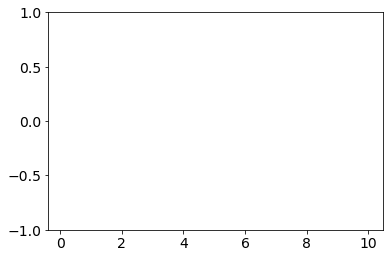

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 41.69390795167894


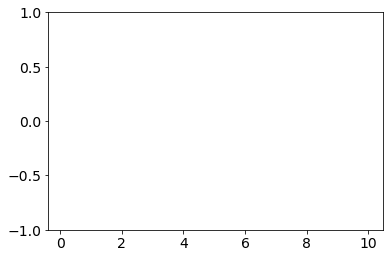

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 15.357693928772552


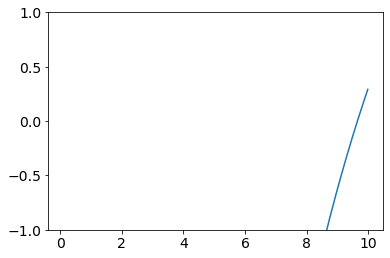

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 9.65262260442067


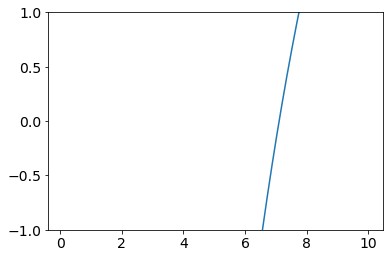

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 7.108887767442467


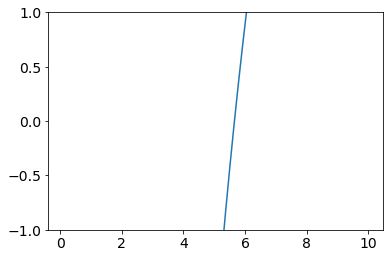

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 5.65691187027144


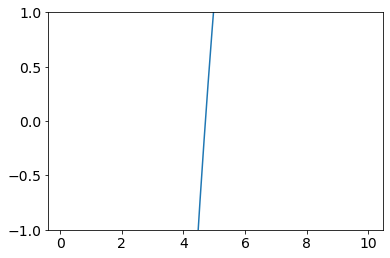

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 4.7135919166878635


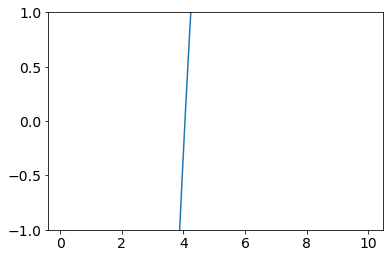

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 4.049457342761716


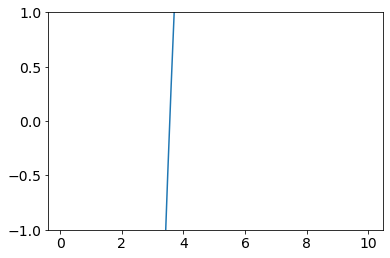

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 3.5554840227605626


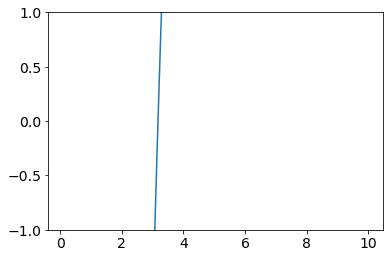

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 3.173092077508435


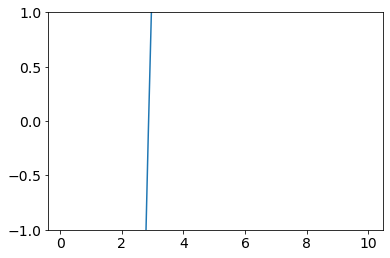

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 2.8679351689499284


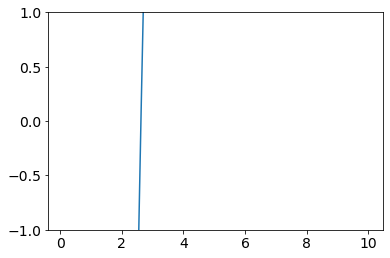

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 2.6185149790445674


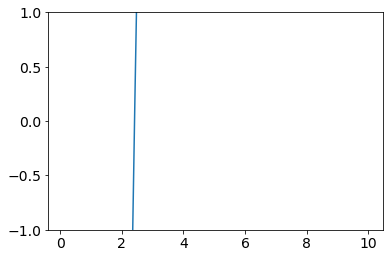

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 2.410672462437672


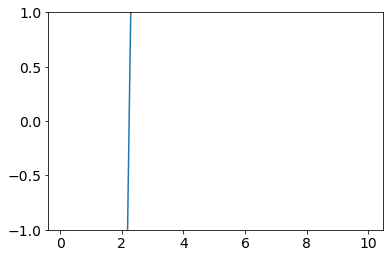

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 2.234693933016681


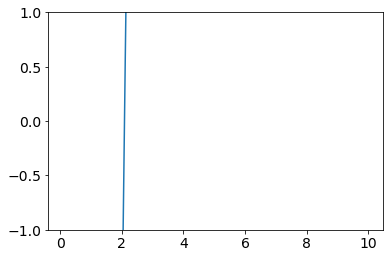

/Users/tantoja/anaconda2/envs/py3/lib/python3.9/site-packages/scipy/optimize/nonlin.py:1077: RuntimeWarning: invalid value encountered in true_divide
  d = v / df_norm**2

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] nan


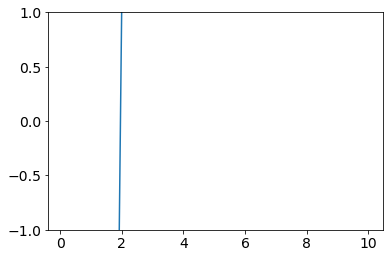

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 1.9526296422091822


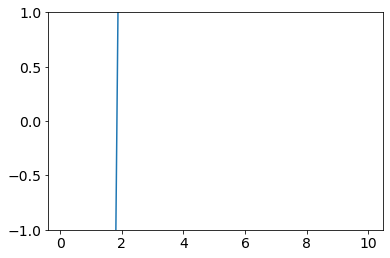

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 1.8377619068986504


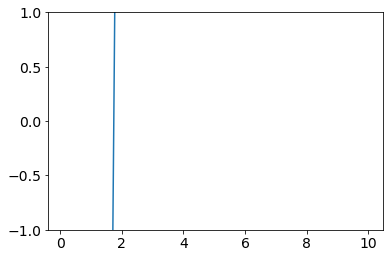

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 1.7362225206983404


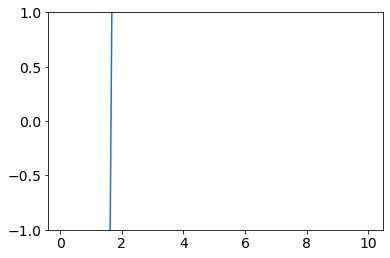

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 1.6457898558185309


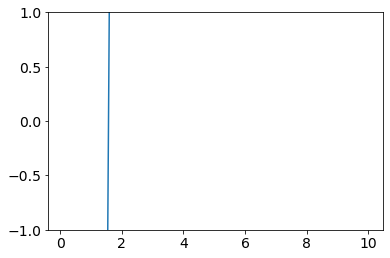

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 1.5647129333349397
[41.69390795 15.35769393  9.6526226   7.10888777  5.65691187  4.71359192
  4.04945734  3.55548402  3.17309208  2.86793517  2.61851498  2.41067246
  2.23469393         nan  1.95262964  1.83776191  1.73622252  1.64578986
  1.56471293]
15


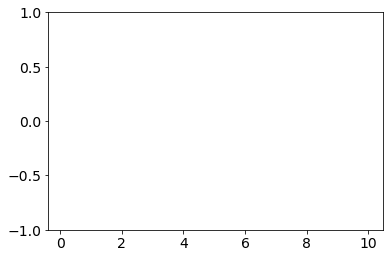

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 60.27754640213225


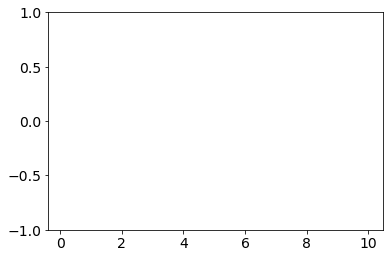

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 22.202862573932823


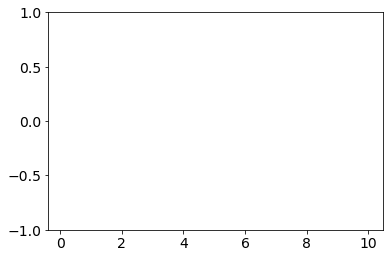

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 13.954950147982185


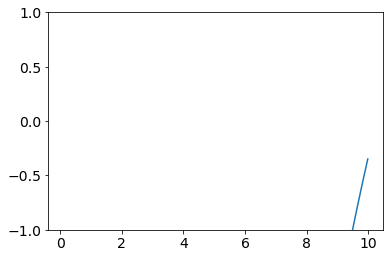

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 10.277432203433182


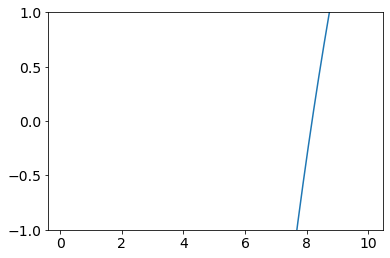

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 8.17828753659271


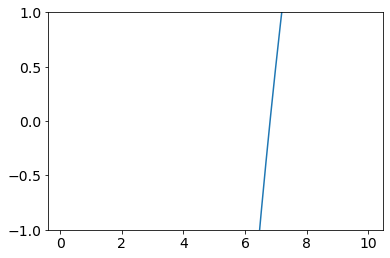

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 6.814514864093645


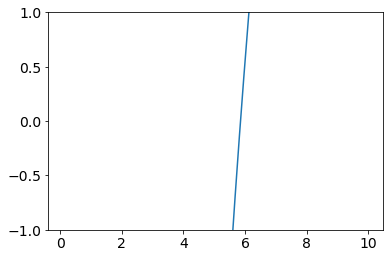

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 5.854364938989735


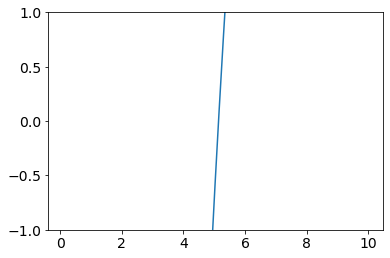

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 5.140219847282499


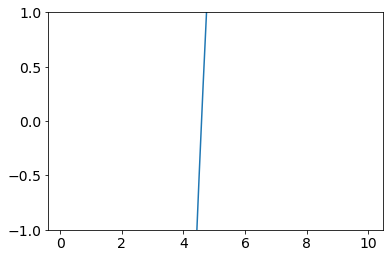

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 4.587389725182884


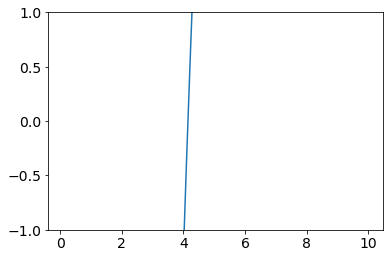

/Users/tantoja/anaconda2/envs/py3/lib/python3.9/site-packages/scipy/optimize/nonlin.py:1077: RuntimeWarning: invalid value encountered in true_divide
  d = v / df_norm**2

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] nan


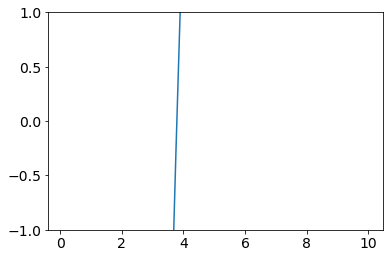

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 3.7856287862716766


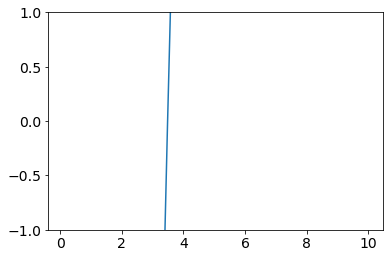

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 3.4851475516119845


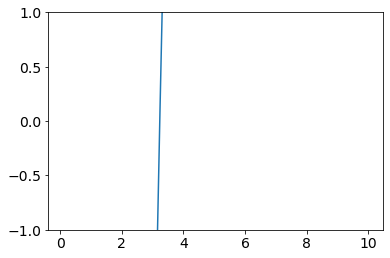

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 3.230732590432368


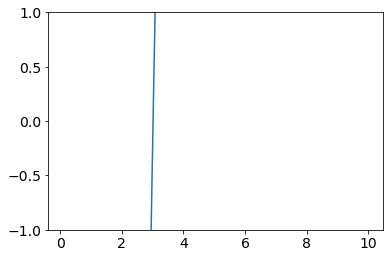

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 3.012421790589876


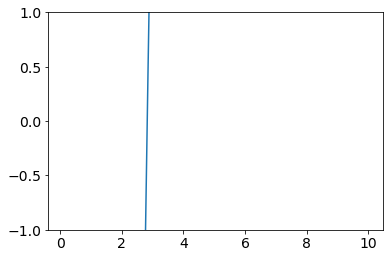

/Users/tantoja/anaconda2/envs/py3/lib/python3.9/site-packages/scipy/optimize/nonlin.py:1077: RuntimeWarning: invalid value encountered in true_divide
  d = v / df_norm**2

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] nan


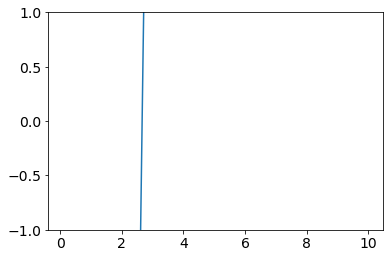

/Users/tantoja/anaconda2/envs/py3/lib/python3.9/site-packages/scipy/optimize/nonlin.py:1077: RuntimeWarning: invalid value encountered in true_divide
  d = v / df_norm**2

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] nan


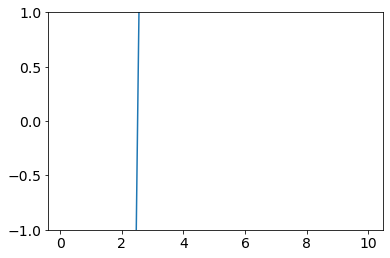

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 2.5100845350623233


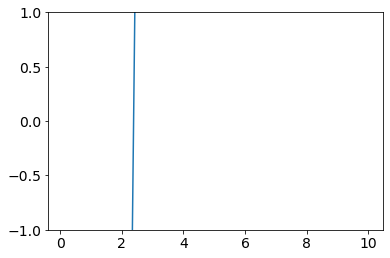

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 2.379344591954118


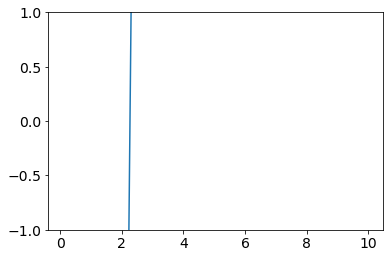

found: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.
 9.5] 2.2621303945512112
[60.2775464  22.20286257 13.95495015 10.2774322   8.17828754  6.81451486
  5.85436494  5.14021985  4.58738973         nan  3.78562879  3.48514755
  3.23073259  3.01242179         nan         nan  2.51008454  2.37934459
  2.26213039]


In [444]:
times=[0,0.1,0.2,0.3,0.4,0.5,1,1.5,3]
times=[1,1.5]


for time,i in zip(times,range(len(times))):
    T=time/ft
    tt= np.abs(t - T).argmin()
    print(tt)
    
  
    phii=np.arange(np.pi,20*np.pi,np.pi)
    phim0=-np.pi #VR positive
    phim0=np.pi/2. #VR negative
    if n>99:# only for Vc flat
        Rii=Vc*(1.-np.sqrt(2)/2)*time/ft*(1./(phii-phim0))
    
    if n<99:# only for Vc flat
        Rii=phii.copy()
        for ii,p in zip(range(len(phii)),phii):
            data=[Vc,n,hr,time,phim0,p]
            x=np.arange(0.1,10,0.01)           
            F2_partial = partial(F2, data)
            
            try:
                plt.plot(x,F2(data,x))
                plt.ylim(-1,1)
                plt.show()
                Rii[ii] = broyden2(F2_partial, 2., f_tol=1e-14)    
                print('found:', phii/(2.*np.pi),Rii[ii] )
            except:
                Rii[ii] = "NaN"
                print('found:', phii/(2.*np.pi), Rii[ii] )
        print(Rii)
    
    Rii=Rii[Rii>5.]


In [ ]:
phii=np.arange(np.pi,2*np.pi,np.pi)
phim0=-np.pi
Rii=phii.copy()
for ii,p in zip(range(len(phii)),phii):
    data=[Vc,n,hr,time,phim0,p]
    x=np.arange(0.1,10,0.1)           
    F2_partial = partial(F2, data)
    Rii[ii] = broyden2(F2_partial, 2., f_tol=1e-14)
    print(Rii)

In [129]:
def F(x,Vc=Vc,n=n,hr=hr,t=0.5,phi0m=-np.pi,phi=np.pi):
    V=Vc*(x/hr)**(1./n)
    omega=V/x
    kappa=np.sqrt(2.*(1.+1./n)*(Vc**2./hr**2.)*(x/hr)**(2./n-2.))
    return phi-phi0m-(omega-kappa/2.)*t/ft

def F2(data,x):
    Vc,n,hr,t,phi0m,phi=data[0],data[1],data[2],data[3],data[4],data[5]
    V=Vc*(x/hr)**(1./n)
    omega=V/x
    kappa=np.sqrt(2.*(1.+1./n)*(Vc**2./hr**2.)*(x/hr)**(2./n-2.))
    return phi-phi0m-(omega-kappa/2.)*t/ft


[240.0, -10, 8.0, 5, 1.5707963267948966, 28.274333882308138]
4.5


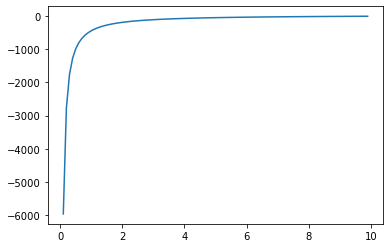

In [181]:
data=[Vc,n,hr,time,phim0,p]
print(data)
print(p/(2.*np.pi))
x=np.arange(0.1,10,0.1)
plt.plot(x,F2(data,x))

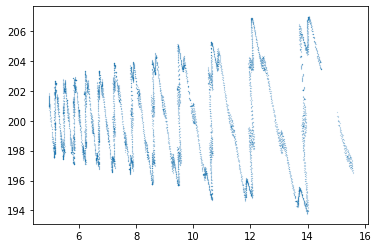

In [221]:
plt.plot(rt[tt,indxy],vphit[tt,indxy],marker='o',markersize=0.1,linewidth=0.0)

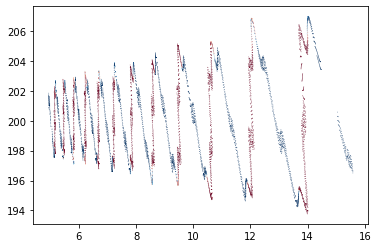

In [222]:
plt.scatter(rt[tt,indxy],vphit[tt,indxy],c=vrt[tt,indxy],marker='o',s=0.4,linewidth=0.,cmap='RdBu',vmin=-1,vmax=1)


r0 [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8]
phi0 0.6981317007977318


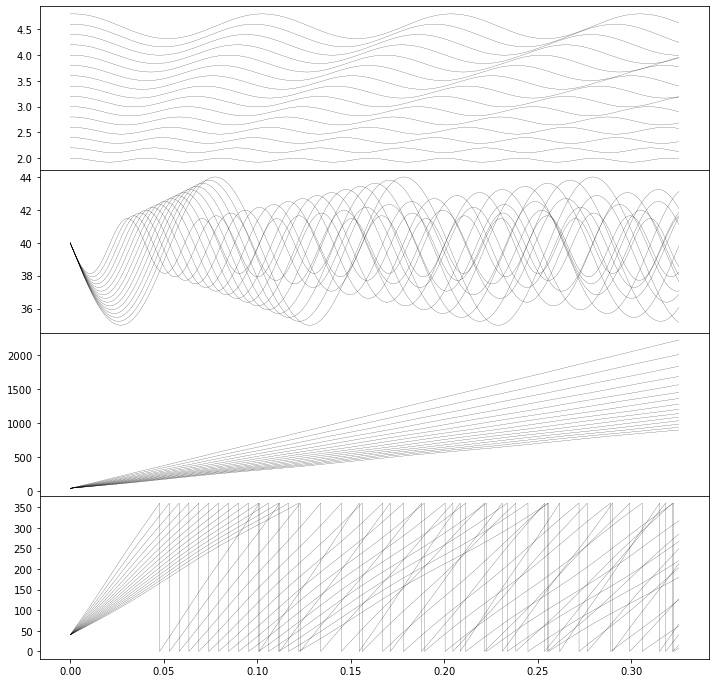

In [21]:
t1=np.arange(0.,2.,0.00001)/ft

R01=np.arange(2.,5.,0.2)
#R01=np.arange(2.,5.,3.)#tests

phi01=np.deg2rad(40.)
rt1=np.zeros((len(t1),len(R01)))
vrt1=rt1.copy()
phit1=rt1.copy()
vphit1=rt1.copy()
phi2t1=rt1.copy()

for i in range(len(R01)):
    rt1[:,i],vrt1[:,i],phit1[:,i],vphit1[:,i],phi2t1[:,i]=orbits(R01[i],phi01,t1,rper=20.,Dve=40.,epsilon=1.,m=0.,Vc=200.,n=-10.,hr=8.,D=20.)
                                                       
print('r0',R01)
print('phi0',phi01)
   

nrows=4
ncols=1
fig = plt.figure(constrained_layout=False,figsize=(ncols*12,nrows*3))
gs = fig.add_gridspec(nrows,ncols, hspace=0, wspace=0.)
ax = gs.subplots(sharex=True)

for i in range(len(R01)):
    ax[0].plot(t1,rt1[:,i],color='k',linewidth=0.2)
    ax[1].plot(t1,np.rad2deg(phi2t1[:,i]),color='k',linewidth=0.2)
    ax[2].plot(t1,np.rad2deg(phit1[:,i]),color='k',linewidth=0.2)
    ax[3].plot(t1,np.rad2deg(phit1[:,i]%(2.*np.pi)),color='k',linewidth=0.2)



(500000, 32)


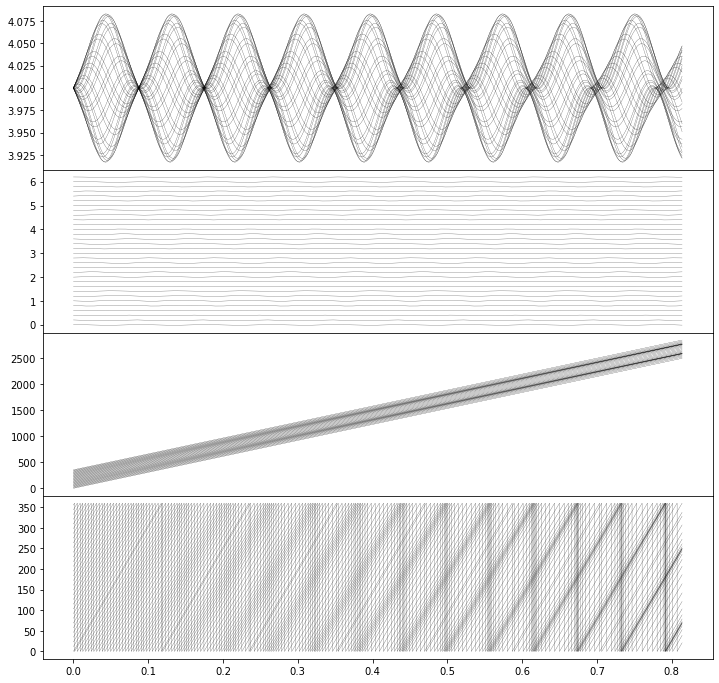

In [22]:
t1=np.arange(0.,5.,0.00001)/ft

R01=4.
phi01=np.arange(0,2*np.pi,0.2)
rt1=np.zeros((len(t1),len(phi01)))
vrt1=rt1.copy()
phit1=rt1.copy()
vphit1=rt1.copy()
phi2t1=rt1.copy()
print(vrt1.shape)

for i in range(len(phi01)):
    rt1[:,i],vrt1[:,i],phit1[:,i],vphit1[:,i],phi2t1[:,i]=orbits(R01,phi01[i],t1,rper=20.,Dve=10.,epsilon=1.,m=0.,Vc=200.,n=-10.,hr=8.,D=20.)
                                                       
nrows=4
ncols=1
fig = plt.figure(constrained_layout=False,figsize=(ncols*12,nrows*3))
gs = fig.add_gridspec(nrows,ncols, hspace=0, wspace=0.)
ax = gs.subplots(sharex=True)

for i in range(len(phi01)):
    ax[0].plot(t1,rt1[:,i],color='k',linewidth=0.2)
    ax[1].plot(t1,phi2t1[:,i],color='k',linewidth=0.2)
    ax[2].plot(t1,np.rad2deg(phit1[:,i]),color='k',linewidth=0.2)
    ax[3].plot(t1,np.rad2deg(phit1[:,i]%(2.*np.pi)),color='k',linewidth=0.2)

In [33]:
#for plots as a function of time
t1=np.arange(0.,1.5,0.00001)/ft

R01=np.arange(2,5,0.1)
phi01=np.arange(0,2*np.pi,0.4)

R01=np.arange(2.,5.,0.2)
phi01=np.arange(0,2*np.pi,0.6)

rt1=np.zeros((len(t1),len(R01),len(phi01)))
vrt1=rt1.copy()
phit1=rt1.copy()
vphit1=rt1.copy()
phi2t1=rt1.copy()
print(rt1.shape)

for i in range(len(R01)):
    for j in range(len(phi01)):
        rt1[:,i,j],vrt1[:,i,j],phit1[:,i,j],vphit1[:,i,j],phi2t1[:,i,j]=orbits(R01[i],phi01[j],t1,rper=20.,Dve=30.,epsilon=1.,m=0.,Vc=200.,n=-10.,hr=8.,D=20.)

(150000, 15, 11)


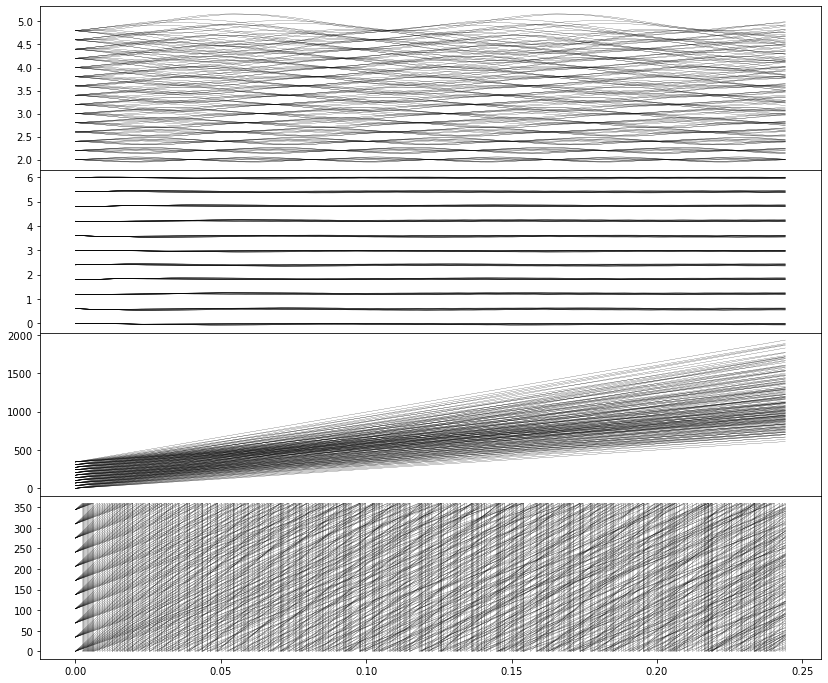

In [24]:
nrows=4
ncols=1
fig = plt.figure(constrained_layout=False,figsize=(ncols*14,nrows*3))
gs = fig.add_gridspec(nrows,ncols, hspace=0, wspace=0.)
ax = gs.subplots(sharex=True)

for i in range(len(R01)):
    for j in range(len(phi01)):
        ax[0].plot(t1,rt1[:,i,j],color='k',linewidth=0.2)
        ax[1].plot(t1,phi2t1[:,i,j],color='k',linewidth=0.2)
        ax[2].plot(t1,np.rad2deg(phit1[:,i,j]),color='k',linewidth=0.2)
        ax[3].plot(t1,np.rad2deg(phit1[:,i,j]%(2.*np.pi)),color='k',linewidth=0.2)

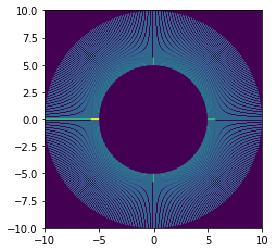

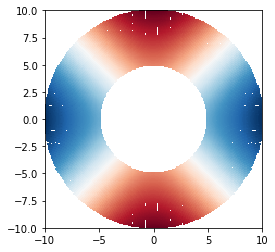

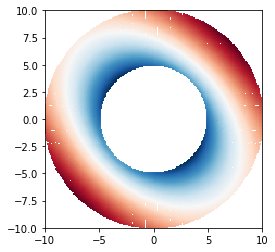

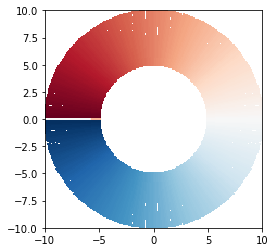

In [17]:

bins=np.arange(-10,11.,0.1)
bins=(bins,bins)
#print(len(bins[0]))
#print(bins[0])

lim=(-10,10)

x2=xt[tt,:,:].flatten()
y2=yt[tt,:,:].flatten()
VR=vrt[tt,:,:].flatten()
Vphi2=vphit[tt,:,:].flatten()
phi2=phit[tt,:,:].flatten()

fig = plt.figure()
ax = fig.add_subplot(111)
n,e,e,g=ax.hist2d(x2,y2, bins=bins)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')



alpha=np.arctan2(y2,-x2)
mVR,xedge,yedge,binnumber=stats.binned_statistic_2d(x2,y2, VR, statistic='mean', bins=bins)
mVphi2,xedge,yedge,binnumber=stats.binned_statistic_2d(x2,y2, Vphi2, statistic='mean', bins=bins)
mphi2,xedge,yedge,binnumber=stats.binned_statistic_2d(x2,y2, phi2, statistic='mean', bins=bins)
#malpha,xedge,yedge,binnumber=stats.binned_statistic_2d(x2,y2, alpha, statistic='mean', bins=bins)

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.hist2d(x2,y2, bins=bins,weights=VR,cmap='RdBu')#,vmin=-30,vmax=30)
im = ax.pcolormesh(xedge,yedge, mVR.T, cmap='RdBu')#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.hist2d(x2,y2, bins=bins,weights=VR,cmap='RdBu')#,vmin=-30,vmax=30)
im = ax.pcolormesh(xedge,yedge, mVphi2.T, cmap='RdBu')#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.hist2d(x2,y2, bins=bins,weights=VR,cmap='RdBu')#,vmin=-30,vmax=30)
im = ax.pcolormesh(xedge,yedge, np.deg2rad(mphi2.T), cmap='RdBu')#,norm=mcolors.PowerNorm(nn), cmap=mycolormap)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
